In [1]:
import os
import numpy as np
import pandas as pd
from scipy import signal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import mwarp1d
import projpath
from rris_trial_data import *
from emg_processing import *

# Read data

### Read walking trials and mvc trial

In [2]:
trial_names, trial_data = read_data()

### Read gait timestamps from motion videos

In [3]:
trial_gait_cycle = read_trial_gait_cycle()

# Process data

### Process initial steps (remove dc offset, filter, rectify, linear envelope)

In [4]:
trial_data = all_trials_process_initial_steps(trial_data, frequency)

### Cut off end frames

In [5]:
n_end_frames_cut = 50
trial_data = all_trials_cut_off_end_frames(trial_data, n_end_frames_cut)

### Normalize amplitude by mvc

In [6]:
trial_data = all_trials_normalize_amplitude_by_mvc(trial_names, trial_data)

## discard mvc trial 
del trial_names[-1]
del trial_data[-1]

### Segment gait cycle

In [7]:
seg_trial_names, seg_trial_data = all_trials_segment(trial_names, trial_data, trial_gait_cycle)
print(f"left limb count = {len(seg_trial_names['L'])}, right limb count = {len(seg_trial_names['R'])}")

left limb count = 6, right limb count = 12


### Normalize time by gait cycle

In [8]:
seg_trial_data = all_trials_normalize_time_by_gait_cycle(seg_trial_names, seg_trial_data, trial_gait_cycle)

# Visualize data

### left limb

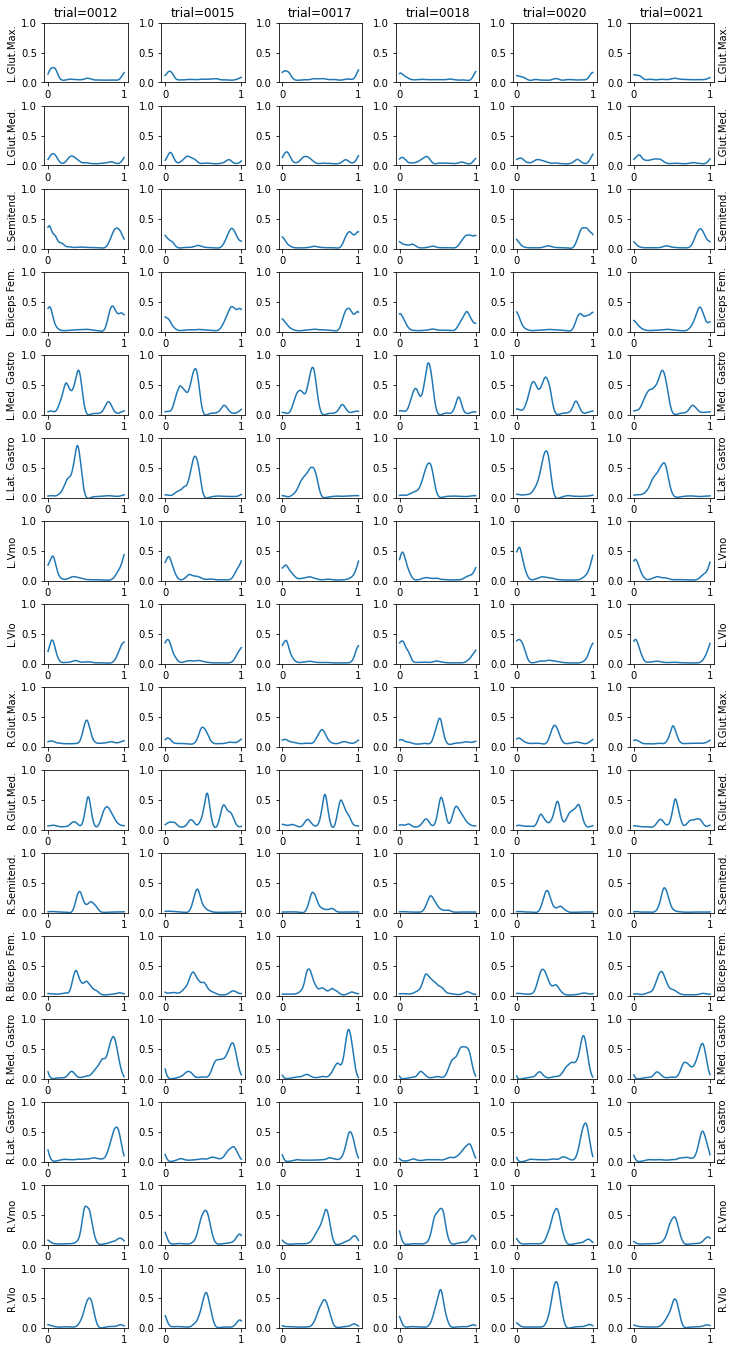

In [9]:
plot_muscle_vs_trial_final_signals(seg_trial_names, seg_trial_data, 'L')

### right limb

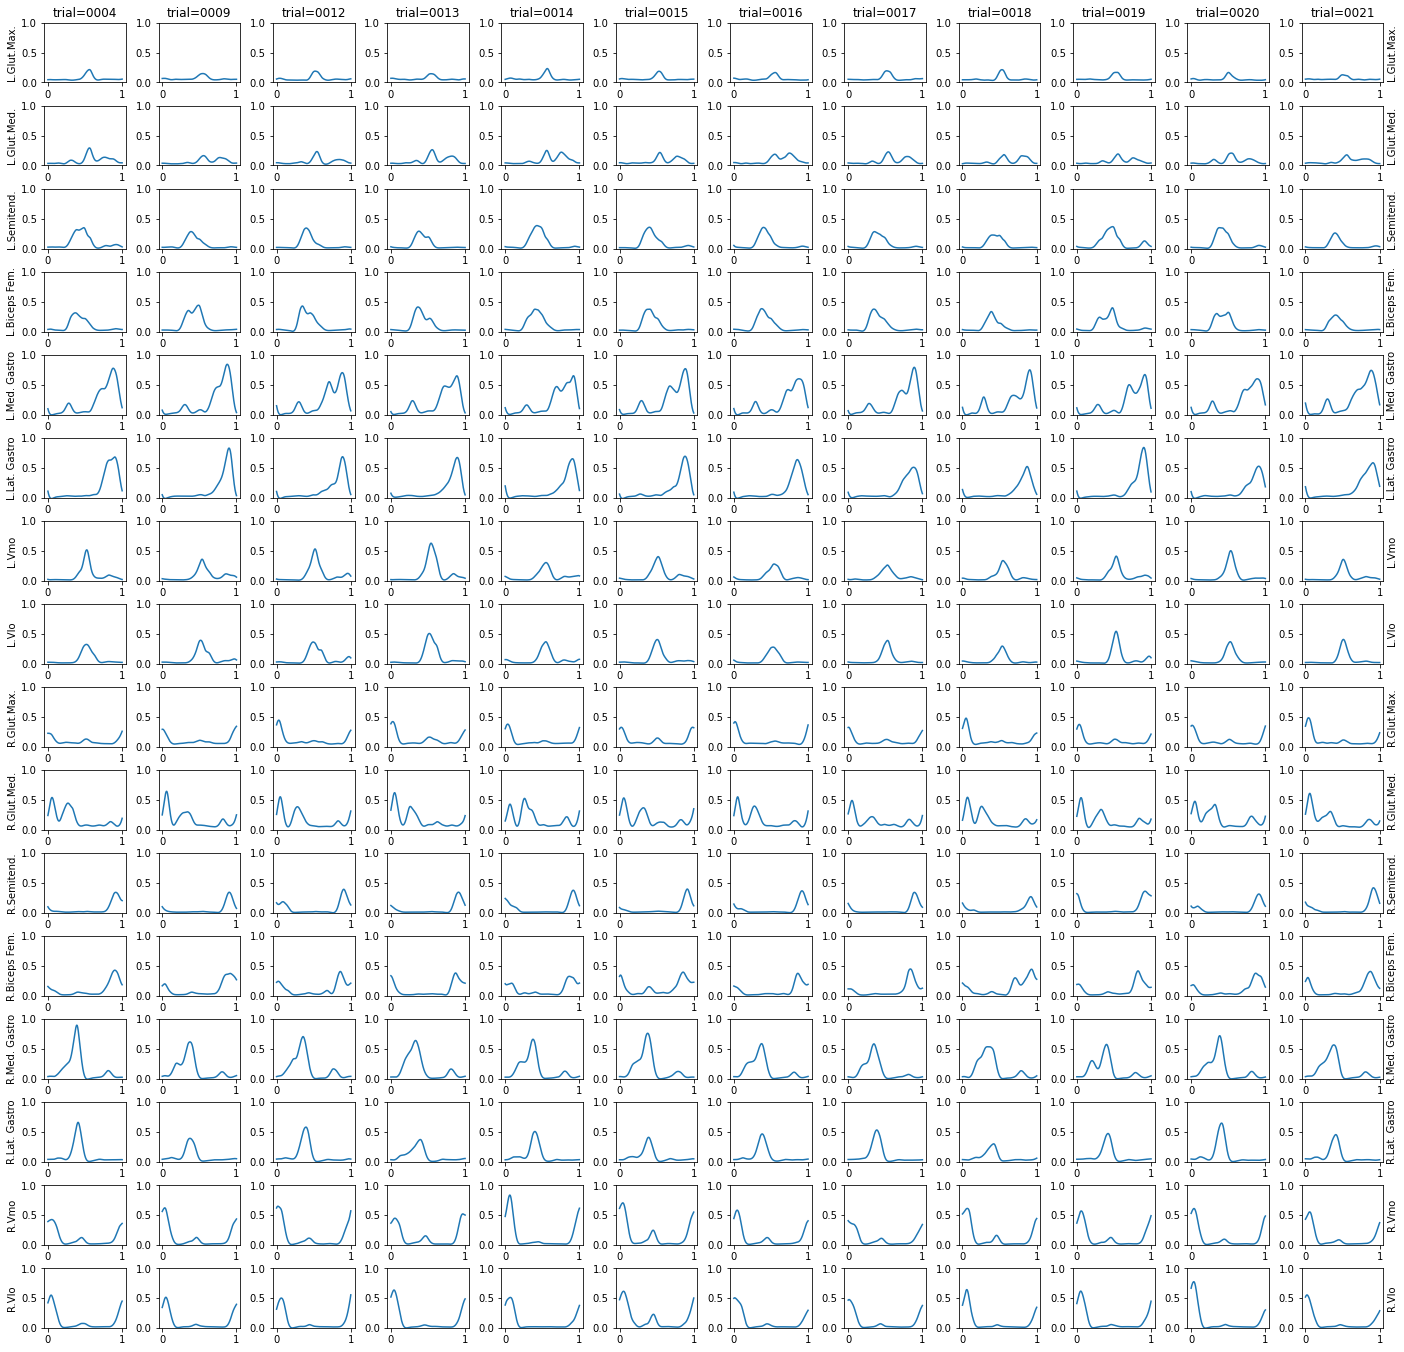

In [10]:
plot_muscle_vs_trial_final_signals(seg_trial_names, seg_trial_data, 'R')

### left and right limb, overlap trials

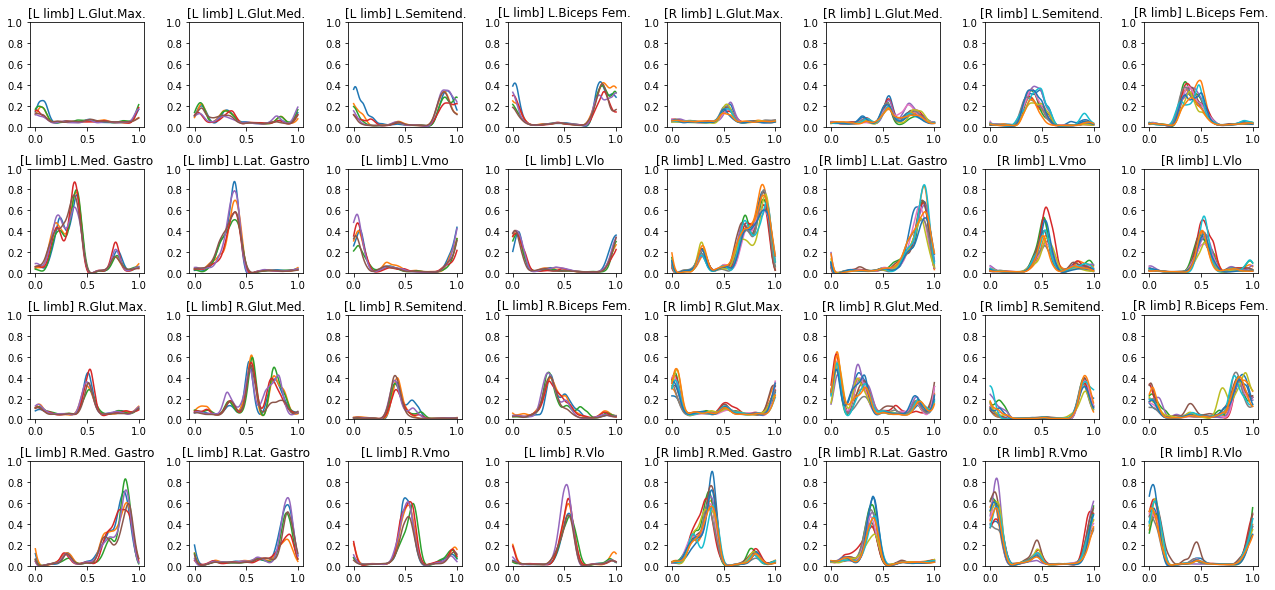

In [11]:
nrows = 4
fig, axes = plt.subplots(nrows=nrows, ncols=8, figsize=(22, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

limb = 'L'
m = 0
for r in range(nrows):
    for c in range(4):
        for data in seg_trial_data[limb]:
            axes[r][c].plot(data.iloc[:,0], data.iloc[:,m+1], '-');
        axes[r][c].set_ylim(0, 1);
        axes[r][c].set_title(f'[{limb} limb] {data.columns[m+1]}')
        m += 1

limb = 'R'
m = 0
for r in range(nrows):
    for c in range(4,8):
        for data in seg_trial_data[limb]:
            axes[r][c].plot(data.iloc[:,0], data.iloc[:,m+1], '-');
        axes[r][c].set_ylim(0, 1);
        axes[r][c].set_title(f'[{limb} limb] {data.columns[m+1]}')
        m += 1